In [1]:
from sklearn import datasets
import numpy as np
import math
from sklearn.model_selection import train_test_split

diabetis = datasets.load_diabetes()
#print(diabetis)
X = diabetis.data[:,:10] 
y = diabetis.target

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33,random_state=549)

train_set_size = len(y_train)
test_set_size = len(y_test)

X_train[0]

array([ 0.01991321,  0.05068012,  0.01427248,  0.0631868 ,  0.01494247,
        0.02029337, -0.04708248,  0.03430886,  0.04666077,  0.09004865])

In [7]:
theta_0=0
theta=np.zeros((10,1))
alpha=0.0001
errors=np.zeros((400,1),dtype=float)
for i in range(400):
    h_theta_xs = np.zeros((train_set_size,1),dtype=float)
    
    
    for j in range(train_set_size):
        h_theta_x = np.dot(np.transpose(X_train[j,:]),theta)
        h_theta_xs[j,0]=h_theta_x
    
    #print(h_theta_xs.shape)
    error = np.transpose(h_theta_xs)-y_train
    errors[i,0]=np.sum(error**2)
    #errors[i,0]=np.sum(math.pow(error,2))
    #print(error.shape)
    res = (1/train_set_size)*alpha*np.sum(error)
    
    theta_0 = theta_0 - res
    for j in range(10) :
        update = np.dot(error , X_train[:,j])
        res = np.dot((1/train_set_size),alpha*np.sum(update))

        theta[j,0] = theta[j,0] - res
print(theta)   

[[ 0.03907589]
 [ 0.02042842]
 [ 0.08246123]
 [ 0.06308537]
 [ 0.03041565]
 [ 0.01784716]
 [-0.05316114]
 [ 0.05780539]
 [ 0.08516962]
 [ 0.04749983]]


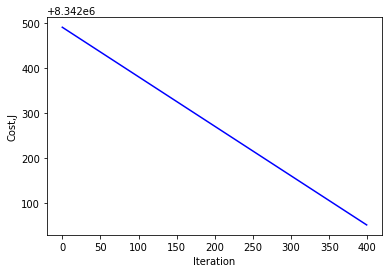

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

i= np.arange(0,400)
plt.xlabel("Iteration")
plt.ylabel("Cost,J")
plt.plot(i,errors,color='blue')